## Importing requirement libraries


In [1]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'seaborn'

## Data Preparation


### Loading datasets FIFA Datasets


In [ ]:
train_df = pd.read_csv(r"./FIFA_datasets/male_players (legacy).csv")
test_df = pd.read_csv(r"./FIFA_datasets/players_22.csv")

/var/folders/4x/mvw9vpw57870gplb61_6lnzh0000gn/T/ipykernel_1160/385824928.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"./FIFA_datasets/male_players (legacy).csv")
/var/folders/4x/mvw9vpw57870gplb61_6lnzh0000gn/T/ipykernel_1160/385824928.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(r"./FIFA_datasets/players_22.csv")


### Data Exploration


In [ ]:
train_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,18/09/2014,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,18/09/2014,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,18/09/2014,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,18/09/2014,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,18/09/2014,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [ ]:
train_df["preferred_foot"]

0          Left
1         Right
2          Left
3         Right
4         Right
          ...  
161578    Right
161579     Left
161580    Right
161581    Right
161582    Right
Name: preferred_foot, Length: 161583, dtype: object

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [ ]:
train_df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,161583.000000,161583.000000,161583.0,161583.000000,161583.000000,1.595300e+05,159822.000000,161583.000000,161583.000000,161583.000000,...,128722.000000,161583.000000,161583.000000,161583.000000,161583.00000,161583.000000,161583.000000,161583.000000,161583.000000,17969.000000
mean,214484.722353,19.125514,2.0,65.699071,70.744008,2.326770e+06,10855.409768,25.123181,181.240205,75.235031,...,57.816892,45.757957,47.669996,45.698588,16.52961,16.274918,16.140374,16.288861,16.636973,39.149090
std,34928.608856,2.559318,0.0,7.040855,6.259121,6.005746e+06,21941.656285,4.670207,6.750148,7.000456,...,12.329739,20.453699,21.336404,20.935273,17.67047,16.834294,16.476466,16.998697,17.980143,10.503788
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,199159.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000,31.000000
50%,220621.000000,19.000000,2.0,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,...,59.000000,50.000000,54.000000,52.000000,11.00000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,236958.000000,21.000000,2.0,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.00000,14.000000,14.000000,14.000000,14.000000,46.000000
max,271817.000000,23.000000,2.0,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.00000,92.000000,95.000000,92.000000,94.000000,68.000000


In [ ]:
columns = [column for column in train_df.columns]
print(columns)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

### Feature Extraction


In [ ]:
# Extracting features
features = [
    "age",
    "height_cm",
    "weight_kg",
    "weak_foot",
    "skill_moves",
    "international_reputation",
    "release_clause_eur",
    "value_eur",
    "wage_eur",
    "pace",
    "shooting",
    "passing",
    "dribbling",
    "defending",
    "physic",
    "attacking_crossing",
    "attacking_finishing",
    "attacking_heading_accuracy",
    "attacking_short_passing",
    "attacking_volleys",
    "skill_dribbling",
    "skill_curve",
    "skill_fk_accuracy",
    "skill_long_passing",
    "skill_ball_control",
    "movement_acceleration",
    "movement_sprint_speed",
    "movement_agility",
    "movement_reactions",
    "movement_balance",
    "power_shot_power",
    "power_jumping",
    "power_stamina",
    "power_strength",
    "power_long_shots",
    "mentality_aggression",
    "mentality_interceptions",
    "mentality_positioning",
    "mentality_vision",
    "mentality_penalties",
    "mentality_composure",
    "defending_marking_awareness",
    "defending_standing_tackle",
    "defending_sliding_tackle",
    "goalkeeping_diving",
    "goalkeeping_handling",
    "goalkeeping_kicking",
    "goalkeeping_positioning",
    "goalkeeping_reflexes",
    "goalkeeping_speed",
]

# Create a mapping for the preferred_foot values
body_type_mapping = {"Left": 0, "Right": 1}

# Mapping the preferred_foot column to numerical values
train_df["preferred_foot"] = train_df["preferred_foot"].map({"Left": 0, "Right": 1})
test_df["preferred_foot"] = test_df["preferred_foot"].map({"Left": 0, "Right": 1})

# Create a mapping for the work_rate values
work_rate_mapping = {
    "Low/Low": 0,
    "Low/Medium": 1,
    "Low/High": 2,
    "Medium/Low": 3,
    "Medium/Medium": 4,
    "Medium/High": 5,
    "High/Low": 6,
    "High/Medium": 7,
    "High/High": 8,
}

# Mapping the work_rate column to numerical values
train_df["work_rate"] = train_df["work_rate"].map(work_rate_mapping)
test_df["work_rate"] = test_df["work_rate"].map(work_rate_mapping)

# Create a mapping for the body_type values
body_type_mapping = {
    "Normal (170-)": 0,
    "Normal (170-185)": 1,
    "Normal (185+)": 2,
    "Lean (170-185)": 3,
    "Lean (185+)": 4,
    "Stocky (170-)": 5,
    "Stocky (170-185)": 6,
    "Stocky (185+)": 7,
}

# Mapping the body_type column to numerical values
train_df["body_type"] = train_df["body_type"].map(body_type_mapping)
test_df["body_type"] = test_df["body_type"].map(body_type_mapping)

# Necessary categorical features to One-hot encode
columns_to_encode = ["preferred_foot", "work_rate", "body_type"]

In [ ]:
train_df["preferred_foot"]

0         0
1         1
2         0
3         1
4         1
         ..
161578    1
161579    0
161580    1
161581    1
161582    1
Name: preferred_foot, Length: 161583, dtype: int64

In [ ]:
train_df["preferred_foot"].isna().any()

False

In [ ]:
train_df["work_rate"].isna().any()

False

In [ ]:
train_df["body_type"].isna().any()

True

### Data Preprocessing & Cleansing


#### Handling Missing Values


In [ ]:
# Handle missing values by performing imputation on rows with missing values in relevant features
def handle_missing_values(df, features):
    """
    Performing imputation on rows with null values in the specified features.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    features (list): List of features to check for null values.

    Returns:
    pd.DataFrame: DataFrame with rows containing null values in the specified features dropped.
    """

    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=["number"]).columns
    categorical_cols = df.select_dtypes(include=["object"]).columns

    # Impute missing values in numerical columns with the mean
    numerical_imputer = SimpleImputer(strategy="mean")
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

    # Impute missing values in categorical columns with the mode
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

    return df

#### Handling Duplicate features


In [ ]:
def handle_duplicates(df, subset=None, keep="first", inplace=False):
    """
    Handle duplicates in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - subset: list of columns to check for duplicates (default is None, which checks all columns)
    - keep: specifies which duplicates to keep ('first', 'last', False)
    - inplace: whether to modify the DataFrame directly or return a modified copy

    Returns:
    - pandas DataFrame with duplicates handled according to parameters
    """
    if subset is None:
        subset = df.columns

    # Identify duplicates
    duplicates = df.duplicated(subset=subset, keep=keep)

    # Handle duplicates
    if inplace:
        return df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return df.drop_duplicates(subset=subset, keep=keep)

#### Tranforming Caterical Features


In [ ]:
# Tranforming necessary caterical features (variables) to their one-hot encodings
def one_hot_encode_columns(df, columns):
    """
    Transforms specified categorical columns to one-hot encoded columns.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    columns (list): List of columns to be one-hot encoded.

    Returns:
    pd.DataFrame: DataFrame with one-hot encoded columns.
    """
    df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_encoded

In [ ]:
train_df["preferred_foot"]

0         0
1         1
2         0
3         1
4         1
         ..
161578    1
161579    0
161580    1
161581    1
161582    1
Name: preferred_foot, Length: 161583, dtype: int64

In [ ]:
# Preprocessing and cleaning the FIFA dataset (male_players)

# Handling missing values
train_df = handle_missing_values(df=train_df, features=features)
test_df = handle_missing_values(df=test_df, features=features)

# Transforming necessary caterical features
train_df = one_hot_encode_columns(df=train_df, columns=columns_to_encode)
test_df = one_hot_encode_columns(df=test_df, columns=columns_to_encode)

# Handling duplicates
# train_df = handle_duplicates(df=train_df, subset=None, keep='first', inplace=True)
# test_df = handle_duplicates(df=test_df, subset=None, keep='first', inplace=True)

## Target Variable & Features Selection


#### Analyze correlation


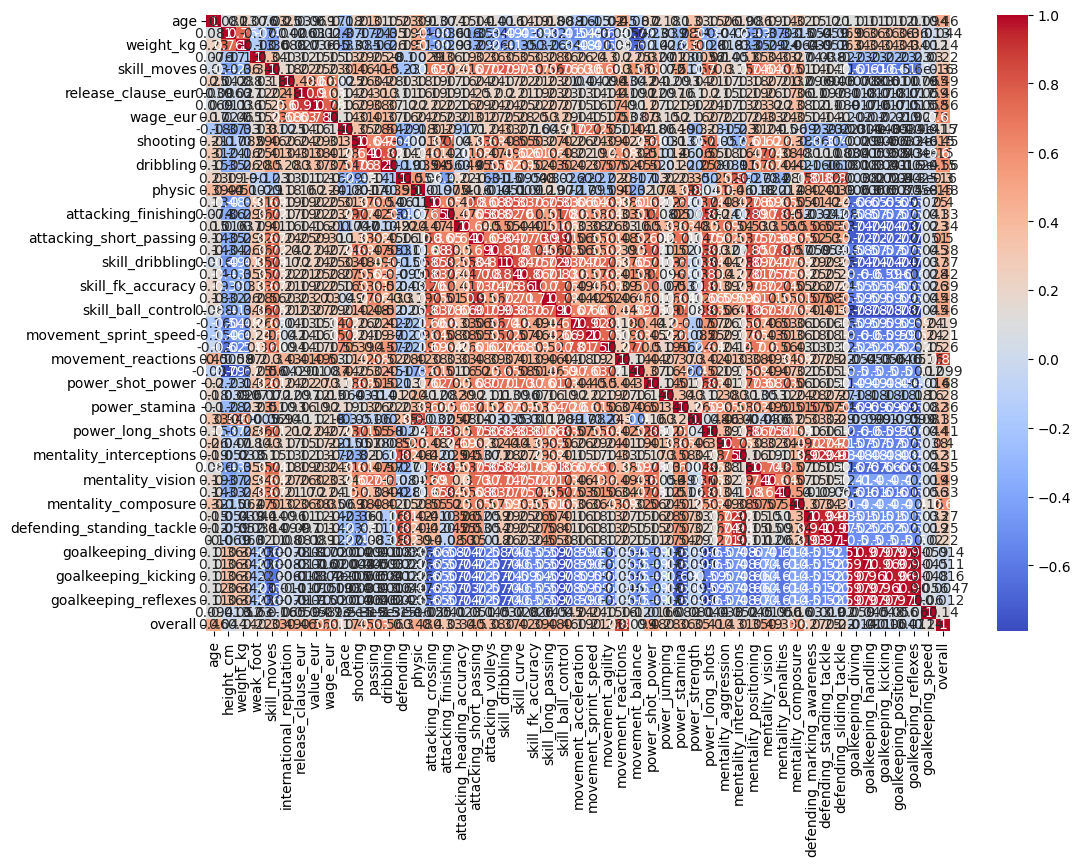

In [ ]:
# Calculate correlation matrix
corr_matrix = train_df[features + ["overall"]].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Selection of highly correlated features


In [ ]:
# Selecting features with high correlation with overall rating (target variable)
relevant_features = corr_matrix["overall"][
    abs(corr_matrix["overall"]) > 0.5
].index.tolist()
relevant_features.remove("overall")

# Extract the target variable and the features
X_train_selected = train_df[relevant_features]
y_train_selected = train_df["overall"]

X_test_selected = test_df[relevant_features]
y_test_selected = test_df["overall"]

In [ ]:
print("Guessed features:", len(features))
print("Relevant features:", len(relevant_features))

Guessed features: 50
Relevant features: 6


#### Feature Scaling / Normalization


In [ ]:
# Normalizing / scaling the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

## Training ML Models


In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, model_name):
    # Fit the model on training data
    model.fit(x_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Mean Squared Error of {model_name}: {mse}")

    return model

### Naïve Bayes


In [ ]:
# Training Naïve Bayes model
nb_model = GaussianNB()

nb_model = train_model(
    nb_model,
    X_train_selected,
    y_train_selected,
    X_test_selected,
    y_test_selected,
    "Naïve Bayes",
)

Mean Squared Error of Naïve Bayes: 9.337283642600967


### Random Forest


In [ ]:
# Training Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_trained = train_model(
    rf_model,
    X_train_selected,
    y_train_selected,
    X_test_selected,
    y_test_selected,
    "Random Forest (RF)",
)

Mean Squared Error of Random Forest (RF): 0.8828529873905172


### Linear Regression


In [ ]:
# Training Linear Regression model
lr_model = LinearRegression()

lr_model_trained = train_model(
    lr_model,
    X_train_selected,
    y_train_selected,
    X_test_selected,
    y_test_selected,
    "Linear Regression (LR)",
)

Mean Squared Error of Linear Regression (LR): 8.67019333323063


### K-Nearest Neighbor (KNN)


In [ ]:
# Training K-Nearest Neighbor (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model_trained = train_model(
    knn_model,
    X_train_selected,
    y_train_selected,
    X_test_selected,
    y_test_selected,
    "K-Nearest Neighbor (KNN)",
)

Mean Squared Error of K-Nearest Neighbor (KNN): 3.186124018919902


## Models Optimization


### Fine-tuning Hyperparameters


In [ ]:
# Define models and parameter grids
models = {
    "KNN": (knn_model, {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}),
    "Linear Regression": (lr_model, {"fit_intercept": [True, False]}),
    "Naive Bayes": (nb_model, {"var_smoothing": [1e-9, 1e-8, 1e-7]}),
    "Random Forest": (
        rf_model,
        {"n_estimators": [100, 200, 300], "max_depth": [10, 20, 30]},
    ),
}

best_models = {}

# Perform Grid Search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(
        estimator=model, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error"
    )
    grid_search.fit(X_train_selected, y_train_selected)
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_test_selected)
    mse = mean_squared_error(y_test_selected, y_val_pred)
    best_models[model_name] = best_model
    print(f"Optimized {model_name} MSE: {mse}")

Optimized KNN MSE: 3.6167033162867517
Optimized Linear Regression MSE: 8.67019333323063


/Users/abubakarosman/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Optimized Naive Bayes MSE: 9.46447320546806


## Saving Trained Models


In [ ]:
# Save the best models to .pkl files
for model_name, best_model in best_models.items():
    with open(
        f'./trained_models/best_trained_{model_name.lower().replace(" ", "_")}_model.pkl',
        "wb",
    ) as f:
        pickle.dump(best_model, f)
    print(
        "Model saved successfully to `best_trained_"
        + model_name.lower().replace(" ", "_")
        + "_model.pkl` in trained_models directory.\n"
    )

Model saved successfully to `best_trained_knn_model.pkl` in trained_models directory.

Model saved successfully to `best_trained_linear_regression_model.pkl` in trained_models directory.

Model saved successfully to `best_trained_naive_bayes_model.pkl` in trained_models directory.

Model saved successfully to `best_trained_random_forest_model.pkl` in trained_models directory.



## Making Predictions


In [ ]:
models = [best_model for model_name, best_model in best_models.items()]

NameError: name 'best_models' is not defined

In [ ]:
value_eur = float(input("Enter the value of the player in euros: "))
wage_eur = float(input("Enter the wage of the player in euros: "))
passing = float(input("Enter the passing rating of the player: "))
dribbling = float(input("Enter the dribbling rating of the player: "))
movement_reactions = float(input("Enter the reactions rating of the player: "))
mentality_composure = float(input("Enter the composure rating of the player: "))

user_input = [
    value_eur,
    wage_eur,
    passing,
    dribbling,
    movement_reactions,
    mentality_composure,
]

In [ ]:
print(
    f"Test Result of Player's Overall Rating Using Random Forest Model: {nb_model.predict([user_input])[0]}"
)

In [ ]:
print(
    f"Test Result of Player's Overall Rating Using Random Forest Model: {rf_model.predict([user_input])[0]}"
)

In [ ]:
print(
    f"Test Result of Player's Overall Rating Using Linear Regression Model: {rf_model.predict([user_input])[0]}"
)

In [ ]:
print(
    f"Test Result of Player's Overall Rating Using K-Nearest Neighbor (KNN) Model: {knn_model.predict([user_input])[0]}"
)

## Deployment of ML Models


In [ ]:
!pip install -r requirements.txt

### **Run the Script Using Streamlit:**

Open a terminal or command prompt,

navigate to the directory where your script is saved `/FIFA_Prediction`,

and run the following command:

**sh** `streamlit run fifa_predictions.py`

You can now view your Streamlit app in your browser.

Local URL: `http://localhost:8501`
